# Assignment 1

## Task 1


In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/iris_data.csv', sep=';')
print(data.head())
print("--")
print(data.shape)
print("--")

    pl   pw   sl   sw  id
0  5.0  3.5  1.3  0.3   1
1  4.8  3.0  1.4  0.2   2
2  4.7  3.2  1.3  0.2   3
3  4.6  3.2  1.5  0.2   4
4  4.9  3.4  1.3  0.2   5
--
(6500, 5)
--


In [4]:
labels = pd.read_csv('/Users/jordicatafal/Documents/GitHub/Data-Mining-I/Assignment I/data/iris_labels-1.csv', sep=';')
print(labels.head())
print("--")
print(labels.shape)

  examiner  id      species
0   Sobhan   1  Iris-setosa
1   Andrej   2  Iris-setosa
2    Ahmad   3  Iris-setosa
3   Matteo   4  Iris-setosa
4   Sobhan   5  Iris-setosa
--
(6500, 3)


In [5]:
merged_data = pd.merge(data, labels, how='inner', on = 'id')

In [6]:
merged_data.drop(['examiner'], axis=1, inplace=True)

In [7]:
merged_data.sort_values(by=['species'], inplace=True)
print(merged_data.head())


       pl   pw   sl   sw    id      species
0     5.0  3.5  1.3  0.3     1  Iris-setosa
3542  4.8  2.9  1.3  0.2  5402  Iris-setosa
3543  4.8  3.1  1.1  0.3  5403  Iris-setosa
3544  5.0  3.6  1.3  0.2  5405  Iris-setosa
3545  5.5  3.7  1.7  0.5  5406  Iris-setosa


In [8]:
import seaborn as sns

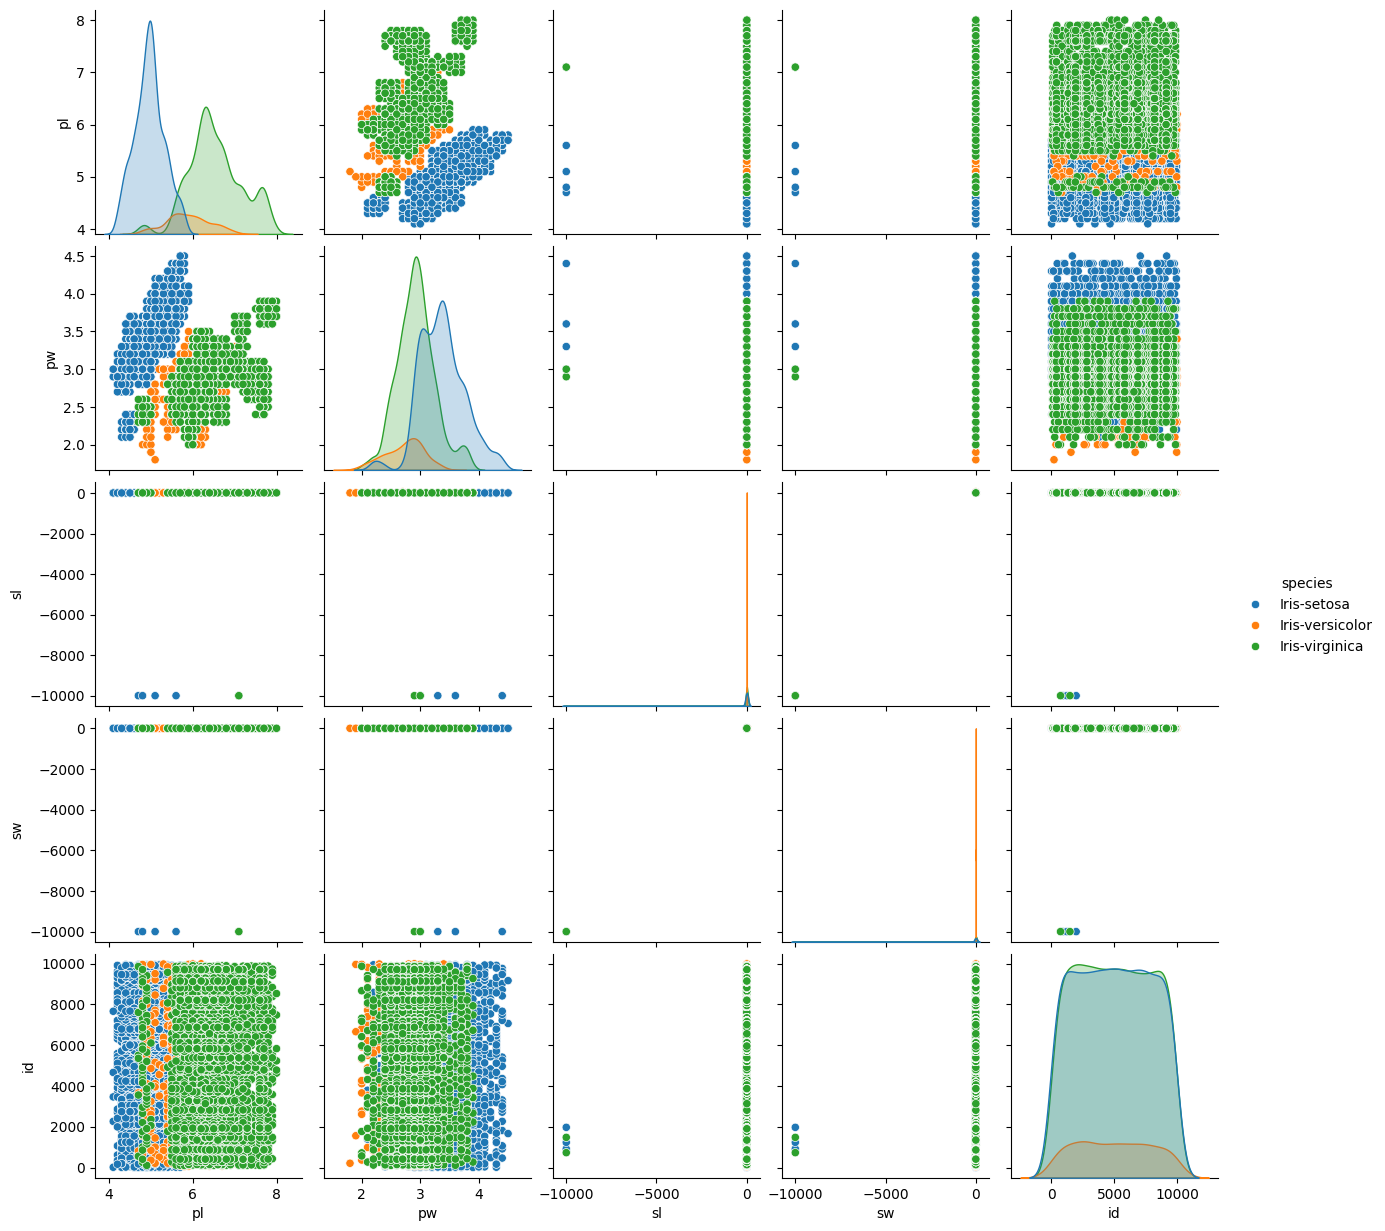

In [9]:
sns.pairplot(merged_data, hue='species')

## Task 2

In [10]:
marged_clean_data = merged_data[merged_data['sl'] != -9999]
print(marged_clean_data.head())
marged_clean_data[marged_clean_data['sl'] == -9999] #there are no -9999 in the data

print(marged_clean_data.shape)


       pl   pw   sl   sw    id      species
0     5.0  3.5  1.3  0.3     1  Iris-setosa
3542  4.8  2.9  1.3  0.2  5402  Iris-setosa
3543  4.8  3.1  1.1  0.3  5403  Iris-setosa
3544  5.0  3.6  1.3  0.2  5405  Iris-setosa
3545  5.5  3.7  1.7  0.5  5406  Iris-setosa
(6494, 6)


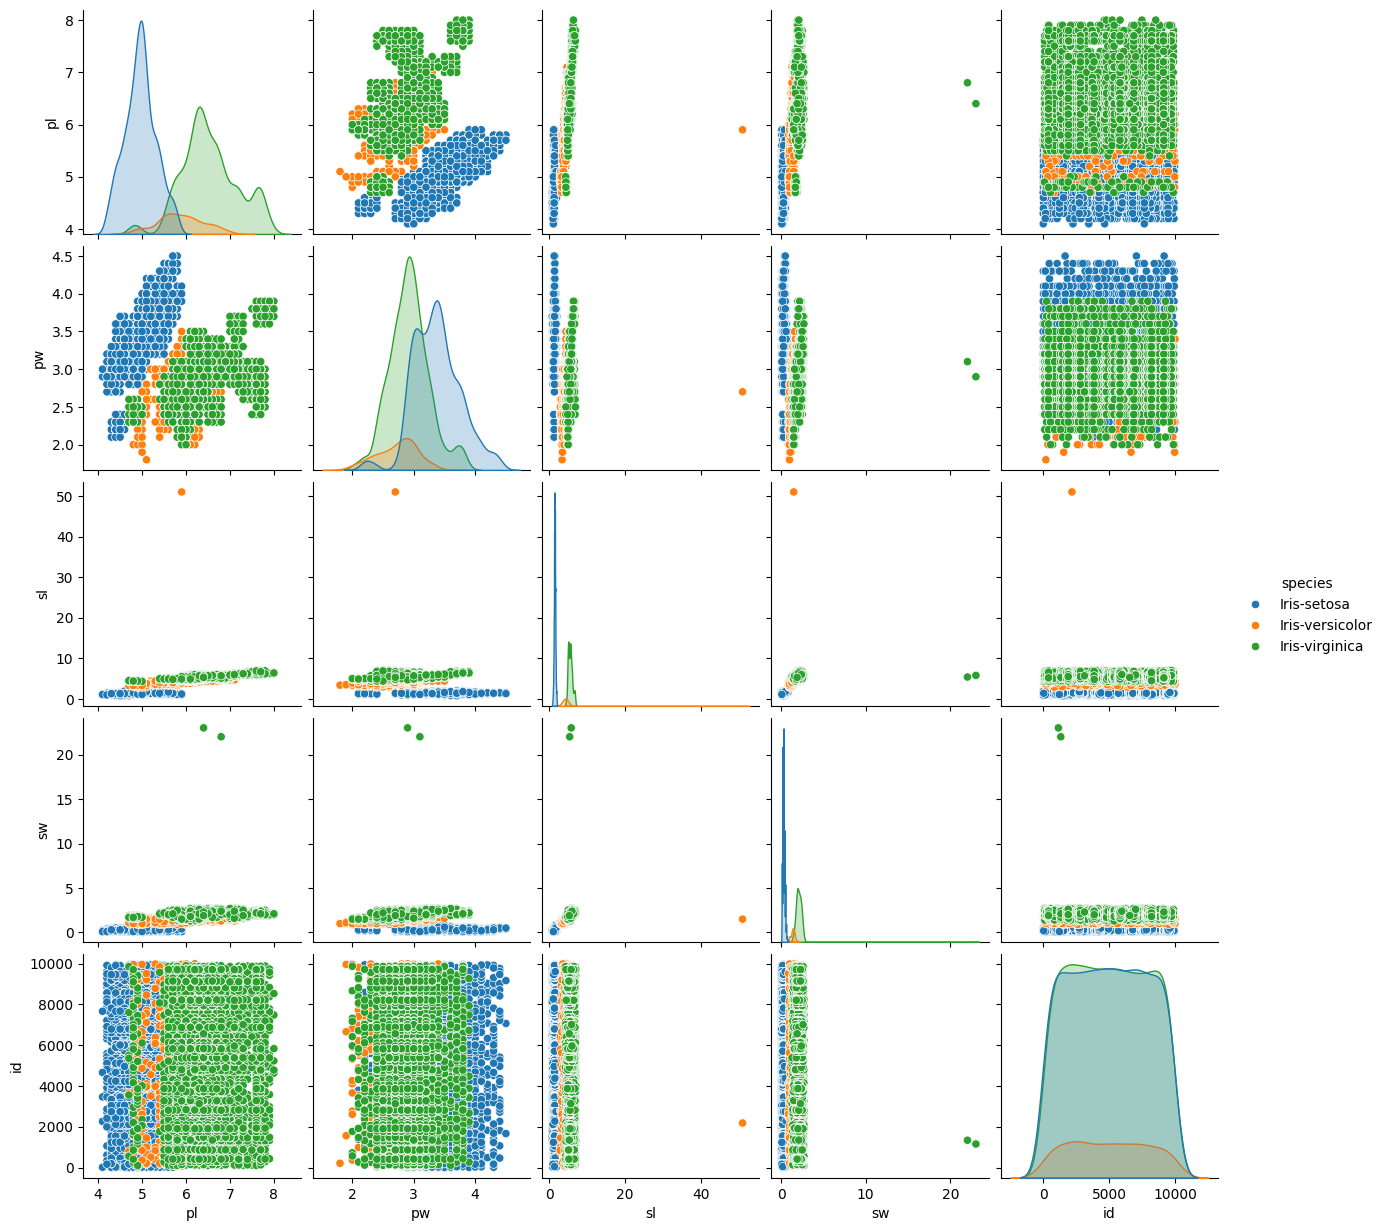

In [11]:
sns.pairplot(marged_clean_data, hue='species')

In [12]:
from scipy import stats


numeric_columns = ['sl', 'sw', 'pl', 'pw']
z_scores = np.abs(stats.zscore(marged_clean_data[numeric_columns]))


outliers_mask = (z_scores < 3).all(axis=1)



In [13]:
# Remove outliers
data_clean = marged_clean_data[outliers_mask]

(6487, 6)


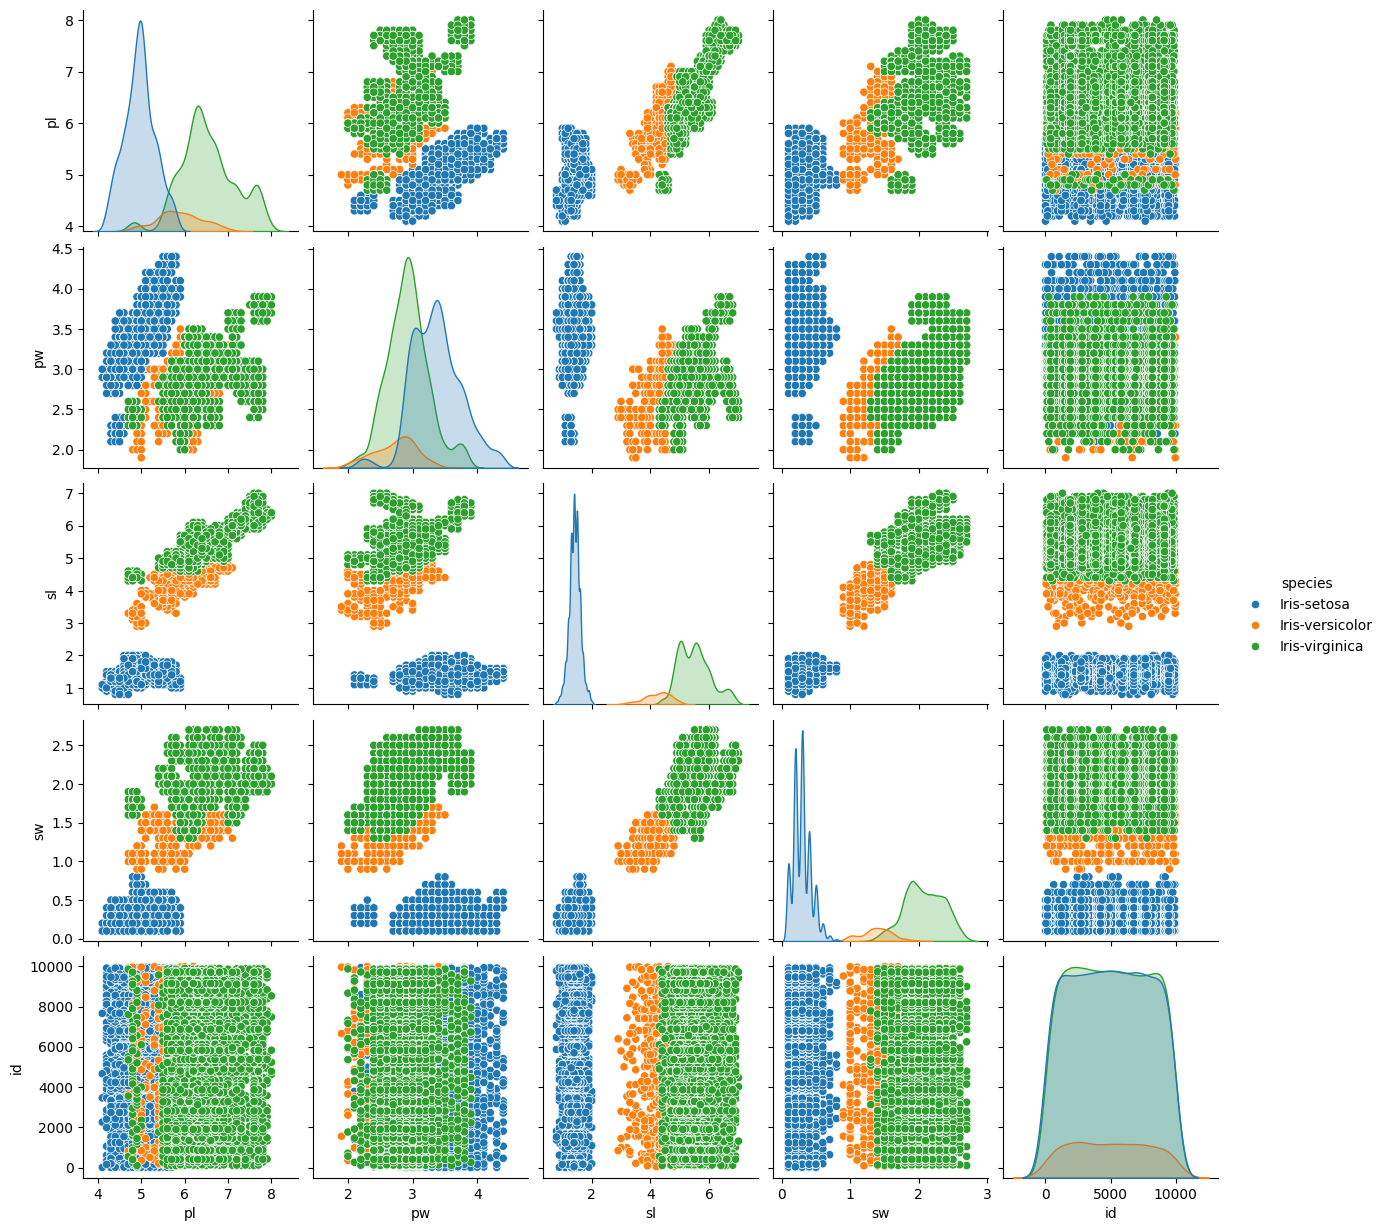

In [14]:
sns.pairplot(data_clean, hue="species")

print(data_clean.shape)

## Task 3

In [15]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['sl', 'sw', 'pl', 'pw']
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_clean[numeric_columns])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

print(normalized_df.head())

print("Average of sepal length after normalization: ", np.average(normalized_df['sl']))
print("Standard deviation of sepal length after normalization: ", np.std(normalized_df['sl']))

         sl        sw        pl    pw
0  0.080645  0.076923  0.230769  0.64
1  0.080645  0.038462  0.179487  0.40
2  0.048387  0.076923  0.179487  0.48
3  0.080645  0.038462  0.230769  0.68
4  0.145161  0.153846  0.358974  0.72
Average of sepal length after normalization:  0.4388106237288472
Standard deviation of sepal length after normalization:  0.32554026184977275


In [16]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['sl', 'sw', 'pl', 'pw']
scaler = StandardScaler()

standardized_data = scaler.fit_transform(data_clean[numeric_columns])
standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns)

print(standardized_df.head())

print("Average of sepal length after standardization: ", np.average(standardized_df['sl']))
print("Standard deviation of sepal length after standardization: ", np.std(standardized_df['sl']))


         sl        sw        pl        pw
0 -1.100219 -1.016767 -0.826709  0.897153
1 -1.100219 -1.129807 -1.044654 -0.500613
2 -1.199309 -1.016767 -1.044654 -0.034691
3 -1.100219 -1.129807 -0.826709  1.130114
4 -0.902037 -0.790687 -0.281847  1.363075
Average of sepal length after standardization:  -2.1030400071826612e-16
Standard deviation of sepal length after standardization:  1.0


[[-0.55033185 -0.07997715  0.01199958 -0.01134184]
 [-0.56103583  0.15621668 -0.06213707 -0.02897125]
 [-0.56810512  0.08438395 -0.00562929 -0.05170511]
 ...
 [ 0.57543884  0.10543236  0.05589974 -0.02935203]
 [ 0.67338418 -0.22027817  0.04913326 -0.00631199]
 [ 0.44573029  0.0980808  -0.03535322 -0.00098845]]


<Axes: >

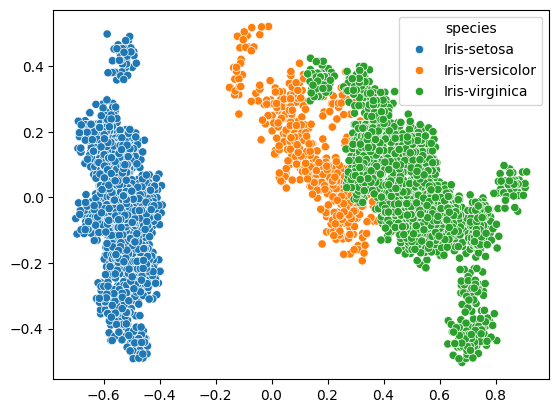

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(normalized_df)

print(pca_result)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data_clean['species'])

In [18]:
components_df = pd.DataFrame(
    data=pca.components_,
    columns=numeric_columns,
    index=["PC1", "PC2", "PC3", "PC4"]
)

# Calculate the average absolute contribution of each attribute
attribute_contribution = components_df.abs().mean(axis=0)
    
# Sort the contributions in descending order
attribute_contribution_sorted = attribute_contribution.sort_values(ascending=False)


print("Average Absolute Contribution of Each Attribute to the Principal Components:")
print(attribute_contribution_sorted)

print("\nFull PCA Components (Eigenvectors):")
print(components_df)

print("4 components are selected because they explain the most variance in the data")

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

Average Absolute Contribution of Each Attribute to the Principal Components:
pl    0.487490
sw    0.434407
pw    0.406321
sl    0.391236
dtype: float64

Full PCA Components (Eigenvectors):
           sl        sw        pl        pw
PC1  0.625450  0.646391  0.411583 -0.146934
PC2  0.046966  0.033014 -0.442674 -0.894843
PC3 -0.123537  0.631999 -0.678916  0.352688
PC4  0.768990 -0.426223 -0.416788  0.230818
4 components are selected because they explain the most variance in the data
[0.87203482 0.09149205 0.02992514 0.00654798]
[0.87203482 0.96352688 0.99345202 1.        ]


In [19]:
copied_data = data_clean.copy()

scaler = MinMaxScaler(feature_range=(0, 100))
copied_data['pl'] = scaler.fit_transform(copied_data[['pl']])

numeric_columns = ['sl', 'sw', 'pl', 'pw']

pca = PCA()
pca.fit_transform(copied_data[numeric_columns])

components_df = pd.DataFrame(
    data=pca.components_,
    columns=numeric_columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Calculate the average absolute contribution of each attribute
attribute_contribution = components_df.abs().mean(axis=0)
    
# Sort the contributions in descending order
attribute_contribution_sorted = attribute_contribution.sort_values(ascending=False)

print("Average Absolute Contribution of Each Attribute to the Principal Components:")
print(attribute_contribution_sorted)

print("\nFull PCA Components (Eigenvectors):")
print(components_df)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

Average Absolute Contribution of Each Attribute to the Principal Components:
sw    0.419752
pw    0.381013
sl    0.380474
pl    0.276435
dtype: float64

Full PCA Components (Eigenvectors):
           sl        sw        pl        pw
PC1  0.076435  0.031487  0.996571 -0.003393
PC2  0.859855  0.414621 -0.080026 -0.286939
PC3 -0.088670 -0.433312  0.017438 -0.896702
PC4  0.496935 -0.799587 -0.011703  0.337016
[9.97795489e-01 1.95448751e-03 1.86824044e-04 6.31993919e-05]
[0.99779549 0.99974998 0.9999368  1.        ]


In [20]:
copied_data2 = data_clean.copy()

copied_data2.loc[0, 'pl'] = 5000

pca = PCA()
pca.fit(copied_data2[numeric_columns])

components_df = pd.DataFrame(
    data=pca.components_,
    columns=numeric_columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Calculate the average absolute contribution of each attribute
attribute_contribution = components_df.abs().mean(axis=0)
    
# Sort the contributions in descending order
attribute_contribution_sorted = attribute_contribution.sort_values(ascending=False)

print("Average Absolute Contribution of Each Attribute to the Principal Components:")
print(attribute_contribution_sorted)

print("\nFull PCA Components (Eigenvectors):")
print(components_df)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

Average Absolute Contribution of Each Attribute to the Principal Components:
sw    0.360406
sl    0.338634
pw    0.298747
pl    0.250020
dtype: float64

Full PCA Components (Eigenvectors):
           sl        sw        pl        pw
PC1 -0.000015 -0.000003  1.000000  0.000058
PC2  0.915744  0.391141  0.000020 -0.091768
PC3 -0.038901 -0.141017  0.000057 -0.989243
PC4  0.399874 -0.909463 -0.000004  0.113920
[9.98690855e-01 1.25935344e-03 3.79044326e-05 1.18874454e-05]
[0.99869085 0.99995021 0.99998811 1.        ]


## Task 4


In [27]:
sampled_data = data_clean.sample(n=150, random_state=1)

print(sampled_data.head())

print(sampled_data['species'].value_counts())

print("Duplicates in the bootstrap sample: ", sampled_data['id'].duplicated().sum())

print("Changing the random state changes the number of versicolor")


       pl   pw   sl   sw    id          species
3408  7.6  2.5  6.7  2.4  5219   Iris-virginica
6339  6.6  3.1  5.9  2.2  9744   Iris-virginica
1258  7.6  2.7  6.7  2.0  1923   Iris-virginica
438   4.9  2.9  1.3  0.4   646      Iris-setosa
3590  4.9  2.1  3.2  1.2  5494  Iris-versicolor
species
Iris-setosa        79
Iris-virginica     60
Iris-versicolor    11
Name: count, dtype: int64
Duplicates in the bootstrap sample:  0
Changing the random state changes the number of versicolor


**What is Bootstrapping?** -> is a statistical resampling technique used to estimate the sampling distribution of an estimator by sampling with replacement from the original sample.

Sampling with Replacement:

In bootstrapping, we create new samples by randomly selecting instances from the original dataset, but with replacement.
This means that after an instance is selected, it's put back into the original dataset, allowing it to be potentially selected again.
As a result, some instances may appear multiple times in a bootstrap sample, while others may not appear at all.

In [33]:
bootstrap_samples = data_clean.sample(n=150, replace=True, random_state=1) #allowing replacement means that the same sample can be selected multiple times

print(bootstrap_samples.head())

print(bootstrap_samples['species'].value_counts())

print("Duplicates in the bootstrap sample: ", bootstrap_samples['id'].duplicated().sum())

print("Changing the random state changes the number of versicolor")

       pl   pw   sl   sw    id         species
1952  7.2  3.0  6.0  1.9  2976  Iris-virginica
3348  5.4  3.8  1.7  0.5  5106     Iris-setosa
6324  6.3  2.8  5.5  2.3  9729  Iris-virginica
2337  7.6  2.6  6.7  2.2  3569  Iris-virginica
2677  5.0  3.3  1.5  0.5  4077     Iris-setosa
species
Iris-setosa        77
Iris-virginica     60
Iris-versicolor    13
Name: count, dtype: int64
Duplicates in the bootstrap sample:  5
Changing the random state changes the number of versicolor


In [38]:
data_clean.columns


stratified_sample = data_clean.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))


print(stratified_sample.head())

print(stratified_sample['species'].value_counts())

print("Duplicates in the bootstrap sample: ", stratified_sample['id'].duplicated().sum())

print("Changing the random state does not change the number of versicolor")

       pl   pw   sl   sw    id      species
3077  4.8  3.1  1.4  0.2  4685  Iris-setosa
2405  4.9  3.5  1.6  0.6  3644  Iris-setosa
295   4.9  2.9  1.3  0.3   452  Iris-setosa
4705  4.7  3.4  1.5  0.3  7207  Iris-setosa
5661  4.9  2.9  1.2  0.3  8702  Iris-setosa
species
Iris-virginica     1498
Iris-setosa        1496
Iris-versicolor     249
Name: count, dtype: int64
Duplicates in the bootstrap sample:  0


/var/folders/q8/_4pkw1w94kz2y2wspjq4df900000gn/T/ipykernel_45563/1457991663.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data_clean.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))


**How does stratified sampling work?** (the function used in the code above)
- We use groupby('species') to separate the data into groups by species.

- apply(lambda x: x.sample(frac=0.5)) samples 50% of the instances from each group.

- This maintains the relative proportions of each species in our sample.

In [43]:
stratified_sample2 = data_clean.groupby('species', group_keys=False).apply(lambda x: x.sample(n=50, replace=True, random_state=1))

print(stratified_sample2.head())

print(stratified_sample2['species'].value_counts())

print("Duplicates in the bootstrap sample: ", stratified_sample2['id'].duplicated().sum())

print("Changing the random state does not change the number of versicolor")

       pl   pw   sl   sw    id      species
5704  5.0  3.8  1.5  0.2  8747  Iris-setosa
3348  5.4  3.8  1.7  0.5  5106  Iris-setosa
5876  4.9  3.3  1.4  0.5  9027  Iris-setosa
2677  5.0  3.3  1.5  0.5  4077  Iris-setosa
723   5.3  3.3  1.3  0.6  1082  Iris-setosa
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Duplicates in the bootstrap sample:  4
Changing the random state does not change the number of versicolor


/var/folders/q8/_4pkw1w94kz2y2wspjq4df900000gn/T/ipykernel_45563/2370700761.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample2 = data_clean.groupby('species', group_keys=False).apply(lambda x: x.sample(n=50, replace=True, random_state=1))


- Equal Stratified Sampling:

    - This method involves sampling an equal number of instances from each stratum (species in this case).
    - We're selecting exactly 50 instances from each species, regardless of their original proportions in the dataset.


- Using replace=True:

    - We use replace=True in the sampling to allow for potential resampling within each species group.
    - This is necessary because some species might have fewer than 50 instances in the original dataset.


- The Code:

    - We use groupby('species') to separate the data into groups by species.
    - apply(lambda x: x.sample(n=50, replace=True)) samples exactly 50 instances from each group, with replacement if necessary.